In [68]:
import pandas as pd
import numpy as np
from importlib import reload
import bcknd as B
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from random import sample
from matplotlib.pyplot import cm 
reload(B)

<module 'bcknd' from '/Users/elliottsaslow/gaalvanize/week_5_notes/clustering/bcknd.py'>

### Simple Example of Clustering Using Iris data set:
Load in the Iris dataset, scatter 2 of the columns and choose 5 random points as centers.

What is clustering? Clustering is calculating the distance to all of the points and choosing a center that is closest to the that point.  This is an unsupervised learning algorithm and it is actually really cool.  I implemented the steps below, and put a nice little doc together to better visualize it.  

As you can see below, I chose 2 cols at random, and scattered them against each other.  Since the data set has 4 dimensions, it is possible, that at the final output, you will notice some points that look close but are colored wrong.  This is just an illusion though as in 4 dimensional space, I have calculated the shortest distance.  

Cool so below, I plotted an intial scatter to start visualize what is going on:

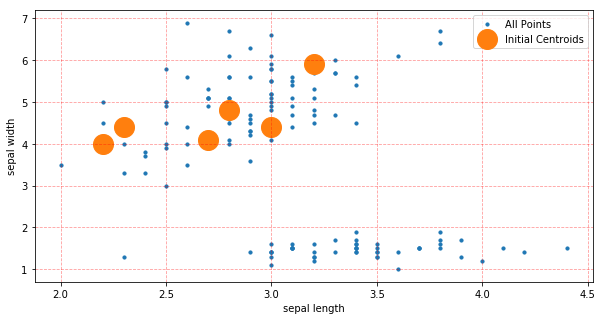

In [111]:
reload(B)
df = load_iris()
data = df.data
idx = sample(range(data.shape[0]),6)
centroids = data[idx,:]
_,ax = plt.subplots(1,1,figsize = (10,5))
B.plot_Scatter(data[:,1],data[:,2],centroids[:,1],centroids[:,2],ax)

Now lets plot the closest distance for all of the points.  You'll notice immediatly, that there are clusters that stick out.  It is pretty cool how the human brain picks these clusters. Heres the algorithm for how I calculated the closest neighbors for these centers.

```
def find_closest(data,centroids):
    num_centroids = centroids.shape[0]
    num_obs = data.shape[0]
    closest_matrix,cnames = make_empty_df(num_obs,num_centroids)

    for j,name in enumerate(cnames):
        center_data = centroids[j,:]
        for i in range(data.shape[0]):
            dist = (np.sqrt(sum(data[i,:]-center_data)**2))
            closest_matrix.loc[i,name] =  dist

    closest = []
    for i in range(closest_matrix.shape[0]):
        distances = closest_matrix.loc[i,:].values

        closest.append(np.argmin(distances))
    return closest
    ```

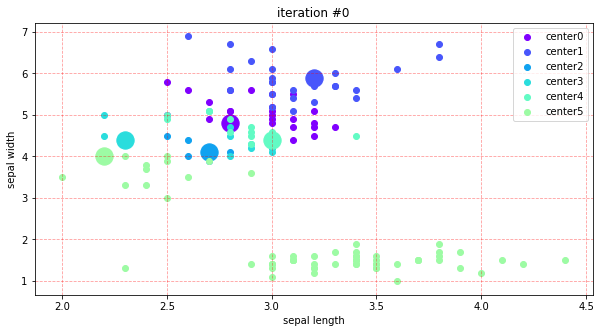

In [112]:
closest = B.find_closest(data,centroids)
_,ax = plt.subplots(1,1,figsize = (10,5))
B.plot_updates(data,centroids,closest,color,ax,0)

Cool!  This is really rad! Now I am going to update these centers by taking the average of all of the points that are closest to it.  Then I am going re-update & plot this over and over again until the algorithm converges.

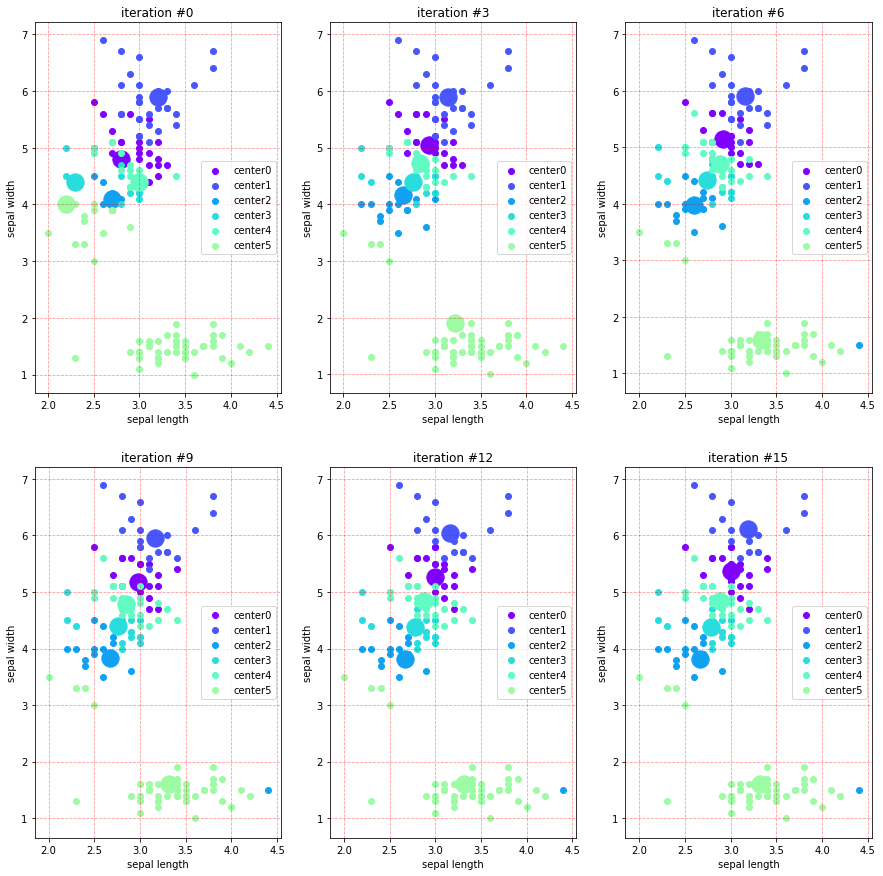

In [113]:
reload(B)
num_centroids = centroids.shape[0]


_,ax = plt.subplots(2,3,figsize = (15,15))
color=cm.rainbow(np.linspace(0,1,10))
ax = np.ndarray.flatten(ax)
n = 6
count = 0
for q in range(n):
    closest = B.find_closest(data,centroids)

    B.plot_updates(data,centroids,closest,color,ax[count],count)
    count += 1
        
            
    centroids = B.update_centroids(data,closest,centroids)

Nice!  Its really cool to see how this updates and converges on these centers.  It is possible to use this on higher dimension datasets although they can be much harder to visualize.  Below is code for updating the centers of the centroids, let me know if you have any questions.

```
def update_centroids(data, closest, centroids):
    num_centroids = centroids.shape[0]
    for i in range(num_centroids):
        cond = np.array(closest) == i

        avg = (np.mean(data[cond,:],axis = 0))
        centroids[i,:] = avg
    return centroids
    ```